<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-Kaggle-Data" data-toc-modified-id="Loading-Kaggle-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Kaggle Data</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Removing-Alphanumerics-&amp;-Punctuations-and-Lowercase-Conversion" data-toc-modified-id="Removing-Alphanumerics-&amp;-Punctuations-and-Lowercase-Conversion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Removing Alphanumerics &amp; Punctuations and Lowercase Conversion</a></span></li><li><span><a href="#Removing-Words-Shorter-Than-Length-3" data-toc-modified-id="Removing-Words-Shorter-Than-Length-3-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Removing Words Shorter Than Length 3</a></span></li><li><span><a href="#Removing-Any-Linebreaks" data-toc-modified-id="Removing-Any-Linebreaks-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Removing Any Linebreaks</a></span></li><li><span><a href="#Removing-Any-Whitespaces" data-toc-modified-id="Removing-Any-Whitespaces-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Removing Any Whitespaces</a></span></li><li><span><a href="#Removing-Any-Duplicated-Space" data-toc-modified-id="Removing-Any-Duplicated-Space-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Removing Any Duplicated Space</a></span></li><li><span><a href="#Removing-Any-Stopwords" data-toc-modified-id="Removing-Any-Stopwords-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Removing Any Stopwords</a></span></li><li><span><a href="#Lemmatizing-Tokens" data-toc-modified-id="Lemmatizing-Tokens-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Lemmatizing Tokens</a></span></li><li><span><a href="#Removing-&quot;-PRON-&quot;-Generated-By-Spacy-Lemmatization" data-toc-modified-id="Removing-&quot;-PRON-&quot;-Generated-By-Spacy-Lemmatization-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Removing "-PRON-" Generated By Spacy Lemmatization</a></span></li><li><span><a href="#Collecting-Only-Nouns-and-Adjectives-From-Corpus" data-toc-modified-id="Collecting-Only-Nouns-and-Adjectives-From-Corpus-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Collecting Only Nouns and Adjectives From Corpus</a></span></li></ul></li><li><span><a href="#Random-Oversampling-of-Minority-Class" data-toc-modified-id="Random-Oversampling-of-Minority-Class-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Random Oversampling of Minority Class</a></span></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>SMOTE</a></span></li><li><span><a href="#ADASYN" data-toc-modified-id="ADASYN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ADASYN</a></span></li><li><span><a href="#Word2vec-embedding-and-Logistic-Regression" data-toc-modified-id="Word2vec-embedding-and-Logistic-Regression-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Word2vec embedding and Logistic Regression</a></span></li><li><span><a href="#Doc2vec-and-Logistic-Regression" data-toc-modified-id="Doc2vec-and-Logistic-Regression-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Doc2vec and Logistic Regression</a></span></li></ul></div>

## Problem Statement

Expressing oneself on online media (such as Facebook, Twitter, and YouTube) is not so easy. It often comes with the threat of abuse and harassment. This may result in people stopping to express themselves or seeking alternative platforms to express their opinions. Similarly, online chat platforms struggle to facilitate conversations which result in completely removing user comments. Thus, a tool which can help improve online conversations is indispensable given the increasingly high number of people on online platforms.

Here, we build a supervised learning model which would be capable of classifying if a given comment is toxic or not. This will be potentially useful to the users so that they can be alerted if there are any threats/bullying going on in the conversation. Additionally, any online chat platforms can benefit by tagging such word choices and replacing it with an appropriate one.

## Importing Libraries

In [94]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re, string, spacy
from yellowbrick.text import FreqDistVisualizer
from sklearn import preprocessing, decomposition
from nltk import word_tokenize, pos_tag
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from collections import Counter
from imblearn.over_sampling import RandomOverSampler,SMOTE,ADASYN
import seaborn as sns
from gensim.models import Word2Vec
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from gensim.models.doc2vec import TaggedDocument
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Loading Kaggle Data

In [2]:
kaggle_data = pd.read_csv('../train.csv')
kaggle_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
kaggle_toxic_comments_binarylabels = []

for i in range(len(kaggle_data['comment_text'])):
    if (kaggle_data['toxic'][i] == 1) or (kaggle_data['severe_toxic'][i] == 1) or (kaggle_data['obscene'][i] == 1) or (kaggle_data['threat'][i] == 1) or (kaggle_data['insult'][i] == 1) or (kaggle_data['identity_hate'][i] == 1):
        kaggle_toxic_comments_binarylabels.append('toxic')
    else:
        kaggle_toxic_comments_binarylabels.append('non-toxic')

In [4]:
kaggle_comments_list = kaggle_data.drop(columns = ['id','toxic','severe_toxic','obscene','threat','insult','identity_hate'])

In [5]:
kaggle_comments_list['label'] = kaggle_toxic_comments_binarylabels
kaggle_comments_list.head(7)

,comment_text,label
0,Explanation\nWhy the edits made under my usern...,non-toxic
1,D'aww! He matches this background colour I'm s...,non-toxic
2,"Hey man, I'm really not trying to edit war. It...",non-toxic
3,"""\nMore\nI can't make any real suggestions on ...",non-toxic
4,"You, sir, are my hero. Any chance you remember...",non-toxic
5,"""\n\nCongratulations from me as well, use the ...",non-toxic
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,toxic


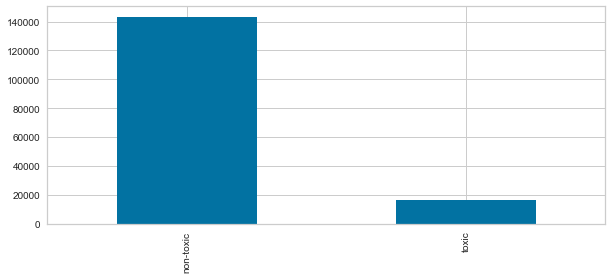

In [6]:
plt.figure(figsize=(10,4))
kaggle_comments_list.label.value_counts().plot(kind='bar');

We have over 10 million words in the data.

## Data Preprocessing

### Removing Alphanumerics & Punctuations and Lowercase Conversion

In [7]:
def data_preprocessing(data):
    alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
    punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
    
    return data.map(alphanumeric).map(punc_lower)

In [8]:
kaggle_comments = data_preprocessing(kaggle_comments_list["comment_text"])

### Removing Words Shorter Than Length 3

In [9]:
def data_removingshortwords(data):
    short_words = lambda x: re.sub(r'\b\w{1,2}\b', '', x)
    
    return data.map(short_words)

In [10]:
kaggle_comments = data_removingshortwords(kaggle_comments)

### Removing Any Linebreaks

In [11]:
def remove_linebreaks(data):
    kaggle_comments_linebreaks_removed = []
    for i in range(len(data)):
        data[i] = data[i].replace('\n',' ')
        kaggle_comments_linebreaks_removed.append(data[i])
    return kaggle_comments_linebreaks_removed

In [12]:
kaggle_comments = remove_linebreaks(kaggle_comments)

### Removing Any Whitespaces

In [13]:
def remove_whitespace(data):
    kaggle_comments_whitespace_removed = []
    for i in range(len(data)):
        data[i] = data[i].strip()
        kaggle_comments_whitespace_removed.append(data[i])
    return kaggle_comments_whitespace_removed

In [14]:
kaggle_comments = remove_whitespace(kaggle_comments)

### Removing Any Duplicated Space

In [15]:
def remove_duplicatedspace(data):
    kaggle_comments_duplicatedspace_removed = []
    for i in range(len(data)):
        data[i] = " ".join(data[i].split())
        kaggle_comments_duplicatedspace_removed.append(data[i])
    return kaggle_comments_duplicatedspace_removed

In [16]:
kaggle_comments = remove_duplicatedspace(kaggle_comments)

### Removing Any Stopwords

In [17]:
def clean_stopwords(data):
    cleaned_text = []
    for sentences in data:
        print (sentences)
        doc = nlp(sentences)
        tokens = [token.text for token in doc if not token.is_stop]
        cleaned_text.append(''.join(tokens))
        
    return cleaned_text

### Lemmatizing Tokens

In [18]:
def lemmatizing(data):
    nlp = spacy.load('en_core_web_sm')
    cleaned_text = []
    for i in range(len(data)):
        doc = nlp(data[i])
        cleaned_text.append(" ".join([token.lemma_ for token in doc]))

    return cleaned_text

In [19]:
kaggle_comments_lemmatized = lemmatizing(kaggle_comments)

### Removing "-PRON-" Generated By Spacy Lemmatization

In [20]:
def remove_stopwords(data):
    kaggle_comments_stopwords_removed = []
    for i in range(len(data)):
        data[i] = data[i].replace('-PRON-','')
        kaggle_comments_stopwords_removed.append(data[i])
    return kaggle_comments_stopwords_removed

In [21]:
kaggle_comments_lemmatized = remove_stopwords(kaggle_comments_lemmatized)

In [22]:
kaggle_comments_lemmatized = remove_duplicatedspace(kaggle_comments_lemmatized)

In [23]:
kaggle_comments_lemmatized_df = pd.DataFrame(kaggle_comments_lemmatized,columns = ["comment_text"])

In [24]:
kaggle_comments_lemmatized = data_removingshortwords(kaggle_comments_lemmatized_df["comment_text"])

### Collecting Only Nouns and Adjectives From Corpus

In [25]:
'''
Given a string of text, tokenize the text and pull out only the nouns and adjectives.
'''

def nouns_adj(data):    
    kaggle_comments_nouns_adj = []
    for i in range(len(data)):
        is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
        tokenized = word_tokenize(data[i])
        nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
        kaggle_comments_nouns_adj.append(' '.join(nouns_adj))
    return kaggle_comments_nouns_adj

In [26]:
kaggle_comments_lemmatized_nouns_adj = nouns_adj(kaggle_comments_lemmatized)

In [27]:
kaggle_comments_lemmatized_df = pd.DataFrame(kaggle_comments_lemmatized,columns = ["comment_text"])

In [28]:
kaggle_comments_lemmatized_df

,comment_text
0,explanation why the edit make under username h...
1,aww match this background colour seemingly stu...
2,hey man really not try edit war just that this...
3,more can make any real suggestion improvement ...
4,sir hero any chance remember what page that
...,...
159566,and for the second time ask when view complete...
159567,should ashamed that horrible thing put talk page
159568,spitzer umm there actual article for prostitu...
159569,and look like actually who put the speedy hav...


In [29]:
kaggle_comments = pd.concat([kaggle_comments_lemmatized_df['comment_text'],kaggle_comments_list['label']],axis=1)

In [29]:
kaggle_comments_list['comment_text'] = kaggle_comments_list['comment_text'].apply(clean_text)

In [30]:
kaggle_comments_list

,comment_text,label
0,explanationwhy edits made username hardcore me...,non-toxic
1,daww matches background colour im seemingly st...,non-toxic
2,hey man im really trying edit war guy constant...,non-toxic
3,morei cant make real suggestions improvement w...,non-toxic
4,sir hero chance remember page thats,non-toxic
...,...,...
159566,second time asking view completely contradicts...,non-toxic
159567,ashamed horrible thing put talk page 128611993,non-toxic
159568,spitzer umm theres actual article prostitution...,non-toxic
159569,looks like actually put speedy first version d...,non-toxic


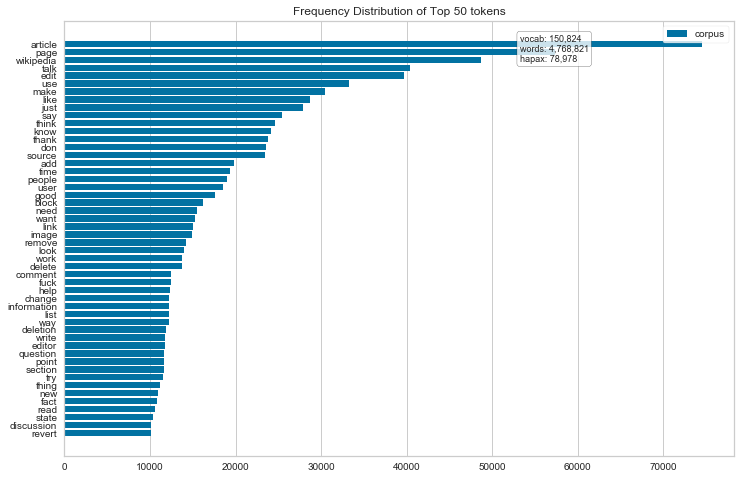

In [35]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(kaggle_comments_list['comment_text'])
features   = vectorizer.get_feature_names()
plt.figure(figsize=(12,8))
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
for label in visualizer.ax.texts:
    label.set_size(20)
visualizer.poof()
plt.show()

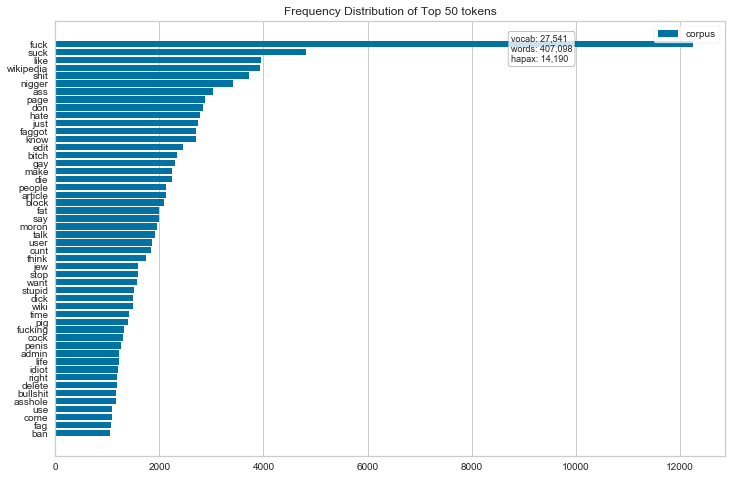

In [37]:
docs       = vectorizer.fit_transform(text for text in kaggle_comments.loc[kaggle_comments_list['label'] == 'toxic']['comment_text'])
features   = vectorizer.get_feature_names()
plt.figure(figsize=(12,8))
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()
plt.show()

In [38]:
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(kaggle_comments.label.values)
X_train, X_test, y_train, y_test = train_test_split(kaggle_comments.comment_text.values, y,
                                                   stratify=y, 
                                                   random_state=42, test_size=0.1)

In [39]:
tfidf = TfidfVectorizer(strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=True,smooth_idf=True,sublinear_tf=True,
            stop_words = 'english')
tfidf.fit(list(X_train) + list(X_test))
X_train_tfidf =  tfidf.transform(X_train) 
X_test_tfidf = tfidf.transform(X_test)

In [40]:
countvec = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english', binary=True)
countvec.fit(list(X_train) + list(X_test))
X_train_countvec =  countvec.transform(X_train) 
X_test_countvec = countvec.transform(X_test)

In [45]:
logregclf = LogisticRegression()
logregclf.fit(X_train_tfidf, y_train)
y_pred = logregclf.predict(X_test_tfidf)
print("---Test Set Results---")
print("Accuracy with logreg: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

---Test Set Results---
Accuracy with logreg: 0.9396540919914776
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14335
           1       0.95      0.43      0.59      1623

    accuracy                           0.94     15958
   macro avg       0.95      0.71      0.78     15958
weighted avg       0.94      0.94      0.93     15958



In [46]:
logregclf = LogisticRegression()
logregclf.fit(X_train_countvec, y_train)
y_pred = logregclf.predict(X_test_countvec)
print("---Test Set Results---")
print("Accuracy with logreg: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

---Test Set Results---
Accuracy with logreg: 0.9574508083719765
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     14335
           1       0.89      0.67      0.76      1623

    accuracy                           0.96     15958
   macro avg       0.93      0.83      0.87     15958
weighted avg       0.96      0.96      0.95     15958



In [83]:
def make_confusion_matrix(model, threshold=0.5):
    y_predict = (model.predict_proba(X_test_countvec)[:, 1] >= threshold)
    binary_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(binary_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d', xticklabels=['Non-toxic', 'Toxic'], yticklabels=['Non-toxic', 'Toxic']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.autoscale()

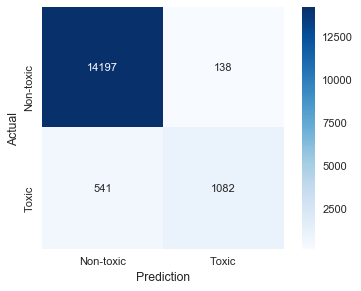

In [85]:
make_confusion_matrix(logregclf.fit(X_train_countvec, y_train))

## Random Oversampling of Minority Class

In [50]:
# Now add some random oversampling of the minority classes
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train_countvec,y_train)

Using TensorFlow backend.


In [55]:
Counter(y_resampled)

Counter({0: 129011, 1: 129011})

In [87]:
logregclf = LogisticRegression()
logregclf.fit(X_resampled, y_resampled)
y_pred = logregclf.predict(X_test_countvec)
print("---Test Set Results---")
print("Accuracy with logreg: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

---Test Set Results---
Accuracy with logreg: 0.9573254793833814
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     14335
           1       0.81      0.75      0.78      1623

    accuracy                           0.96     15958
   macro avg       0.89      0.87      0.88     15958
weighted avg       0.96      0.96      0.96     15958



In [64]:
clf_ros = LogisticRegression().fit(X_resampled, y_resampled)

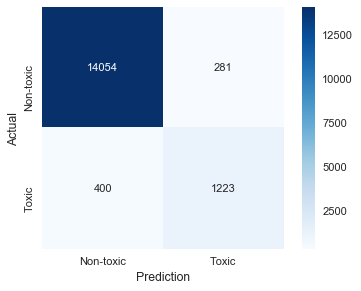

In [86]:
make_confusion_matrix(clf_ros)

## SMOTE

In [88]:
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X_train_countvec,y_train)

In [89]:
Counter(y_smoted)

Counter({0: 129011, 1: 129011})

In [90]:
logregclf = LogisticRegression()
logregclf.fit(X_smoted, y_smoted)
y_pred = logregclf.predict(X_test_countvec)
print("---Test Set Results---")
print("Accuracy with logreg: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

---Test Set Results---
Accuracy with logreg: 0.9033086852989096
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     14335
           1       0.52      0.72      0.60      1623

    accuracy                           0.90     15958
   macro avg       0.74      0.82      0.77     15958
weighted avg       0.92      0.90      0.91     15958



In [91]:
clf_smote = LogisticRegression().fit(X_smoted, y_smoted)

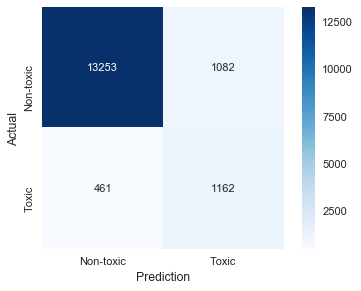

In [92]:
make_confusion_matrix(clf_smote)

## ADASYN

In [95]:
X_adasyn, y_adasyn = ADASYN(random_state=42).fit_sample(X_train_countvec,y_train)

In [96]:
Counter(y_adasyn)

Counter({0: 129011, 1: 127977})

In [97]:
logregclf = LogisticRegression()
logregclf.fit(X_adasyn, y_adasyn)
y_pred = logregclf.predict(X_test_countvec)
print("---Test Set Results---")
print("Accuracy with logreg: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

---Test Set Results---
Accuracy with logreg: 0.8977315453064294
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     14335
           1       0.50      0.72      0.59      1623

    accuracy                           0.90     15958
   macro avg       0.73      0.82      0.76     15958
weighted avg       0.92      0.90      0.91     15958



In [98]:
clf_adasyn = LogisticRegression().fit(X_adasyn, y_adasyn)

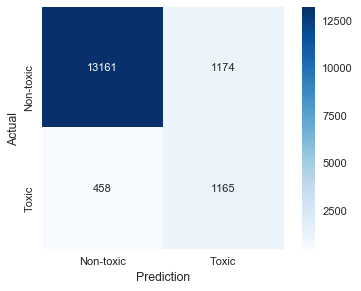

In [99]:
make_confusion_matrix(clf_adasyn)

## Word2vec embedding and Logistic Regression

In [148]:
wv = gensim.models.KeyedVectors.load_word2vec_format("../GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [149]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [150]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [151]:
train, test = train_test_split(kaggle_comments_list, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['comment_text']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['comment_text']), axis=1).values

In [154]:
X_train_word_average = word_averaging_list(wv,train_tokenized);
X_test_word_average = word_averaging_list(wv,test_tokenized);

In [106]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['label'])
y_pred = logreg.predict(X_test_word_average)

In [107]:
print('accuracy %s' % accuracy_score(y_pred, test.label))
print(classification_report(test.label, y_pred))

accuracy 0.9483622994652406
              precision    recall  f1-score   support

   non-toxic       0.96      0.99      0.97     43005
       toxic       0.83      0.62      0.71      4867

    accuracy                           0.95     47872
   macro avg       0.89      0.80      0.84     47872
weighted avg       0.95      0.95      0.95     47872



## Doc2vec and Logistic Regression

In [109]:
def label_sentences(corpus, label_type):
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled

In [110]:
X_train, X_test, y_train, y_test = train_test_split(kaggle_comments_list.comment_text, kaggle_comments_list.label, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [112]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_data)])

100%|██████████| 159571/159571 [00:00<00:00, 2997708.05it/s]


In [113]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 159571/159571 [00:00<00:00, 2946502.85it/s]


In [114]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [115]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

In [116]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

In [118]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9434533756684492
              precision    recall  f1-score   support

   non-toxic       0.96      0.98      0.97     42984
       toxic       0.80      0.60      0.68      4888

    accuracy                           0.94     47872
   macro avg       0.88      0.79      0.83     47872
weighted avg       0.94      0.94      0.94     47872

